In [2]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report


Now we would like to run simple Linear SVM with TfidfVectorizer in it in order to study the results of this simple NLP algorithm

In [4]:
# Load the CSV file into a Pandas dataframe
df = pd.read_csv('dev\PreProcessing\medium_ML_final_sampled_id.csv.csv')

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['stemmed_text'], df['category'], test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a linear SVM model
svm = LinearSVC()
svm.fit(X_train, y_train)

# Make predictions on the test set and calculate evaluation metrics
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[548  99 157  89  84  13]
 [ 91 696  49 162  31  11]
 [117  73 691  59  60  14]
 [ 66 163  50 644  33   4]
 [ 91  26  51  38 789  11]
 [ 15  16  13  24   7 372]]
              precision    recall  f1-score   support

    business       0.59      0.55      0.57       990
      health       0.65      0.67      0.66      1040
   marketing       0.68      0.68      0.68      1014
    politics       0.63      0.67      0.65       960
 programming       0.79      0.78      0.79      1006
      sports       0.88      0.83      0.85       447

    accuracy                           0.69      5457
   macro avg       0.70      0.70      0.70      5457
weighted avg       0.69      0.69      0.69      5457



Now we have the accuracy around 0.69 which is not bad, but still it will be possible to increase the accuracy using more advanced models

Plotting the confusion matrix

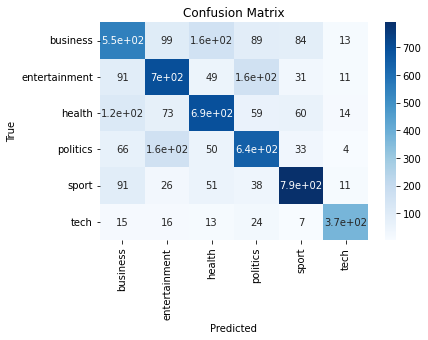

In [5]:
conf_mat = confusion_matrix(y_test, y_pred)

# Create a list of category names
category_names = ["business", "entertainment", "health", "politics", "sport", "tech"]

# Create a heatmap plot of the confusion matrix with category names as labels
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=category_names, yticklabels=category_names)

# Add plot labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


As we can see on the first look the color results for tech category seems not so intensive as for other categories, however they are quite accurate if we study distribution among tech => other classes relation. On the onther side there were some difficulties for our model to destinguish btw business, entertainment and politics categories. And it is understandable, bcs these categories are really close to each other. 

In [6]:
# Save the vectorizer to a file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm, f)

In [7]:
# Save the vectorizer to a file
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [8]:
# Load the saved SVM model
with open('svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

# Vectorize the input text using the saved vectorizer
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
text = "A healthy lifestyle is important for maintaining a strong body and mind. Good nutrition, regular exercise, and sufficient sleep are all essential components of a healthy lifestyle. Eating a balanced diet that is rich in fruits, vegetables, whole grains, and lean proteins can help you maintain a healthy weight and reduce your risk of chronic diseases such as heart disease and diabetes. Regular exercise can also help you manage stress and improve your mood. Make sure to get enough sleep each night, as sleep is crucial for overall health and well-being. By prioritizing your health and making healthy choices each day, you can live a long, happy, and healthy life."
text_vectorized = vectorizer.transform([text])

# Use the SVM model to predict the category of the input text
predicted_category = svm_model.predict(text_vectorized)

print("The predicted category of the input text is:", predicted_category[0])

The predicted category of the input text is: health


However, if we generate the text about "business" category there is a problem for our model to determine the correct categorty

In [9]:
text = "As the global economy continues to recover from the impact of the COVID-19 pandemic, businesses are looking for new ways to grow and thrive in the post-pandemic world. With the rise of digital technologies and changing consumer preferences, companies must be agile and innovative to stay competitive. From leveraging data analytics to exploring new markets and partnerships, businesses must adapt quickly to meet the evolving needs of their customers. Those that can successfully navigate these challenges and seize new opportunities will be well-positioned for success in the years ahead."
text_vectorized = vectorizer.transform([text])

# Use the SVM model to predict the category of the input text
predicted_category = svm_model.predict(text_vectorized)

print("The predicted category of the input text is:", predicted_category[0])

The predicted category of the input text is: politics
